#### 다중퍼셉트론 모델

Epoch 1/5
60000/60000 [==============================] - 3s - loss: 0.6805 - acc: 0.8271     
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 0.3550 - acc: 0.9003     
Epoch 3/5
60000/60000 [==============================] - 3s - loss: 0.3085 - acc: 0.9131     
Epoch 4/5
60000/60000 [==============================] - 2s - loss: 0.2806 - acc: 0.9199     
Epoch 5/5
60000/60000 [==============================] - 3s - loss: 0.2592 - acc: 0.9268     


Using Theano backend.


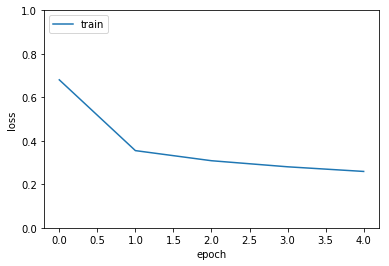

 9088/10000 [==========================>...] - ETA: 0s## evaluation loss and_metrics ##
[0.24370398182570935, 0.9304]
## yhat ##
[[  1.94670080e-04   9.57883003e-07   3.36130470e-04   2.41774251e-03
    1.14805025e-05   9.57551529e-05   1.11772927e-07   9.96463716e-01
    5.20268259e-05   4.27383900e-04]]


In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

#### 컨볼루션 신경망 모델

Epoch 1/5
60000/60000 [==============================] - 515s - loss: 0.7709 - acc: 0.7383   
Epoch 2/5
60000/60000 [==============================] - 796s - loss: 0.2061 - acc: 0.9356   
Epoch 3/5
60000/60000 [==============================] - 2428s - loss: 0.1522 - acc: 0.9521  
Epoch 4/5
60000/60000 [==============================] - 361s - loss: 0.1244 - acc: 0.9609   
Epoch 5/5
60000/60000 [==============================] - 489s - loss: 0.1091 - acc: 0.9658   


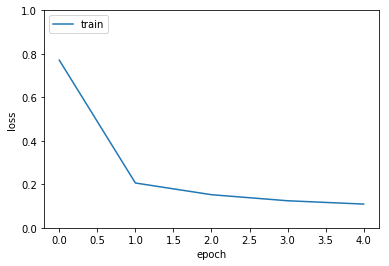

10000/10000 [==============================] - 42s    
## evaluation loss and_metrics ##
[0.045198641968774607, 0.9849]
## yhat ##
[[  1.74862045e-08   1.08841984e-08   4.06357503e-06   2.18256355e-06
    3.36754604e-12   5.66073910e-10   4.98593408e-13   9.99993265e-01
    1.20444472e-08   4.49239224e-07]]


In [2]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)